In [1]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

## Time Series Analysis

**Objectives**

* Understand the structure of time series data

* Techniques to Acquire, Explore and Visualize time series data

* Analyze and Model

* Introduction to statsmodels time series analysis modules.

## Code Dictionary

* web.DataReader - extracts data from various internet sources

* pd.rolling_mean - computes a moving average

* tsa.plot_acf - plot the autocorrelation function

## What is Time series data?

The only reason for time is so that everything doesn’t happen at once. — Albert Einstein

Measurements are performed over time and these observations lead to a collection of organized data called time series. This data is indexed by date and/or timestamp. This is an important form of structured data in many different fields, such as finance, economics, ecology, neuroscience, or physics Examples: Prices of stocks, the weekly output of a manufacturing plant, the monthly number of traffic tickets or Nancy's voice as she grows up.

Time series include:

* Timestamps, specific instants in time

* Fixed periods, i.e. the month of February 2015

* Intervals, indicated by a start and end timestamp.

* Elapsed Time, A measure relative to a given start time.

** Time series data versus Cross sectional data** 

Cross sectional data is a snapshot in time of a group of data.

In [3]:
% matplotlib inline

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')               # This just produces pretty plots
plt.rcParams['figure.figsize'] = (20, 10)   

c:\Users\James\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
c:\Users\James\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3032: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# Pandas URL method 
# target URL: http://www.quandl.com/api/v1/datasets/YAHOO/INDEX_GSPC.csv?trim_start=2007-01-01&trim_end=2015-02-02
# Generate the URL string

url = "http://www.quandl.com/api/v1/datasets/YAHOO/"
url += "INDEX_GSPC"
url += ".csv?trim_start=%s-%s-%s&trim_end=%s-%s-%s" % ('2007', '01', '01', '2015', '02', '02')

sp500 = pd.read_csv(url, parse_dates = ['Date'], dayfirst = True, index_col = 'Date')

# parse_dates: This will parse the "Date" column as a datetime object instead of an object string
# index_col: Instead of creating a default index column, Use the "Date" column as an index
# dayfirst: Use DD/MM format, Default uses the MM/DD format 

In [6]:
sp500.head()

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2015-02-02,1996.670044,2021.660034,1980.900024,2020.849976,4.008330e+09,2020.849976
2015-01-30,2019.349976,2023.319946,1993.380005,1994.989990,4.538650e+09,1994.989990
2015-01-29,2002.449951,2024.640015,1989.180054,2021.250000,4.127140e+09,2021.250000
2015-01-28,2032.339966,2042.489990,2001.489990,2002.160034,4.067530e+09,2002.160034
2015-01-27,2047.859985,2047.859985,2019.910034,2029.550049,3.329810e+09,2029.550049


In [7]:
import pandas.io.data as web

c:\Users\James\Anaconda\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [8]:
# This is the Pandas Remote Data Access module. It supports various Data Sources - Yahoo! Finance, Google Finance
# St.Louis FED (FRED), Kenneth French’s data library, World Bank, Google Analytics
# 

spc = web.DataReader(name = "^GSPC", data_source = 'yahoo', start = '2007-1-1', end = '2015-2-2')
#spc.to_csv("SP500.csv")         # Function to save a data frame for offline analysis  
spc.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-27,2047.859985,2047.859985,2019.910034,2029.550049,3329810000,2029.550049
2015-01-28,2032.339966,2042.489990,2001.489990,2002.160034,4067530000,2002.160034
2015-01-29,2002.449951,2024.640015,1989.180054,2021.250000,4127140000,2021.250000
2015-01-30,2019.349976,2023.319946,1993.380005,1994.989990,4538650000,1994.989990
2015-02-02,1996.670044,2021.660034,1980.900024,2020.849976,4008330000,2020.849976


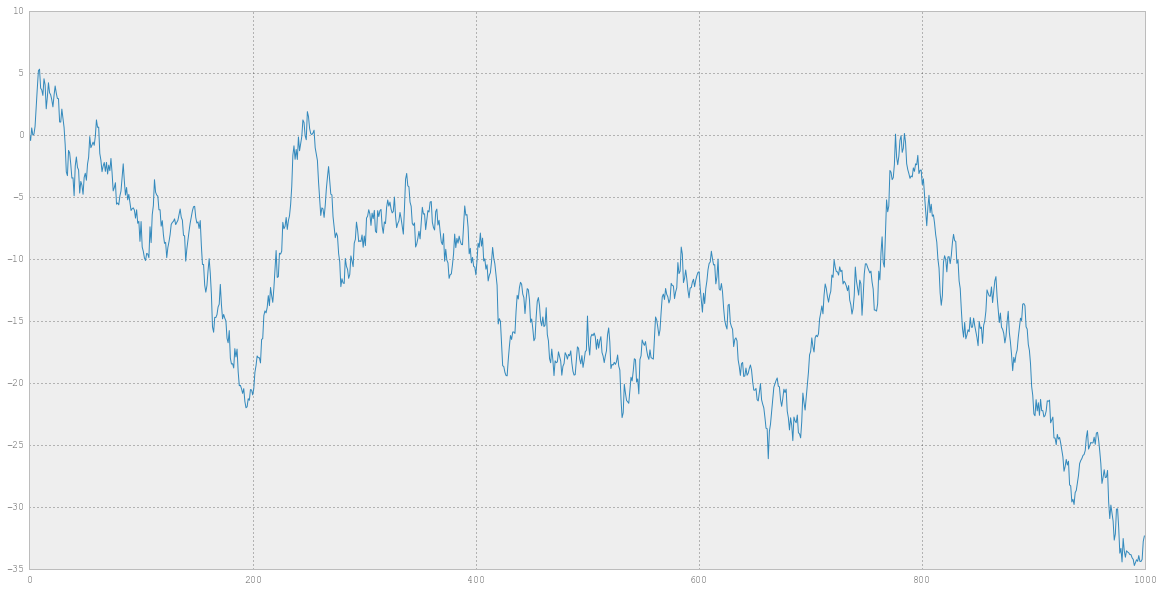

In [9]:
## Random Walk:  Generate your own time series

N = 1000
z = np.random.randn(N)
walk = np.zeros(N)

for i in np.arange(1, N, 1):
    walk[i] = walk[i - 1] + z[i]
plt.plot(walk)

c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=30,window=42,center=False).mean()
  from IPython.kernel.zmq import kernelapp as app
c:\Users\James\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=30,window=252,center=False).mean()
  app.launch_new_instance()


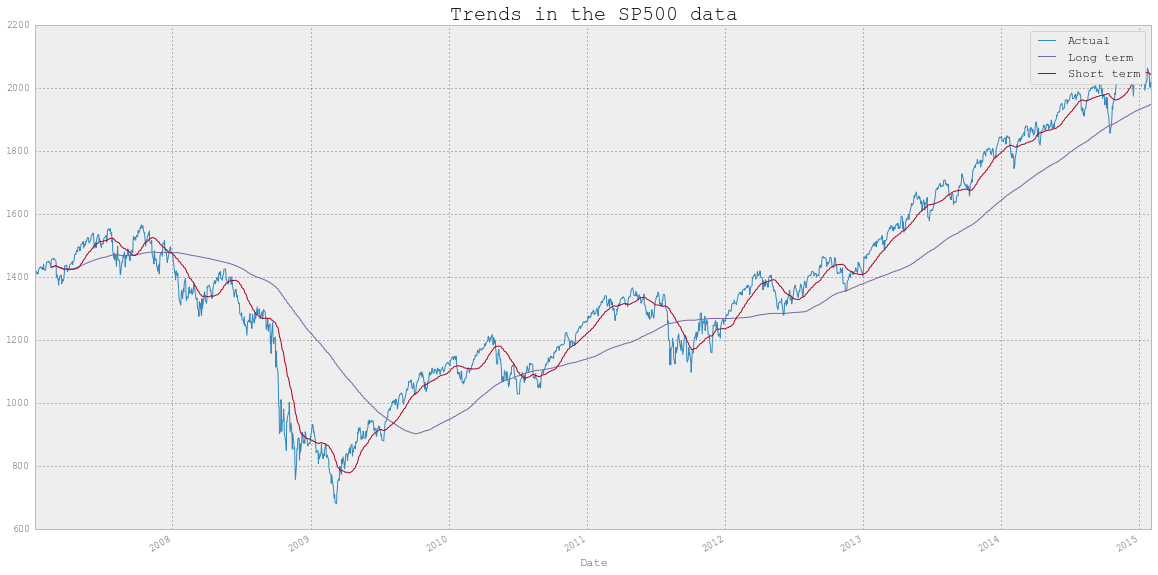

In [10]:
# Compute rolling statistics
spc['MA42'] = pd.rolling_mean(spc['Open'], window = 42, min_periods = 30)
spc['MA252'] = pd.rolling_mean(spc['Open'], window = 252,  min_periods = 30)
spc[['Open', 'MA252', 'MA42']].plot()
plt.legend(["Actual", "Long term", "Short term"])
plt.title('Trends in the SP500 data', fontsize = 20)

## Seasonality and Trends

Let us further explore trends in Time series data. Google breaks down search traffic according to economic sectors on a yearly basis. Let us take the example of the Google Rental Index for New York City. The data clearly shows seasonal variations.

Why is it important to study seasonality? eg: How does the quality of the computers produced vary systematically over the days of the week?

Similarly, Trends identify the underlying tendencies in the data over a period of time. By using trend estimation it is possible to construct a model which is independent of anything known about the nature of the process of an incompletely understood system (for example, physical, economic, or other system). (src: wikipedia)

Once they have been identified, the data is de-seasonalized and de-trended to study the effect of other components such as cyclical and irregular variations. The Google Domestic Trends are very well curated. You can play with the data offline, by downloading the csv. As an example of irregular or anomalous behaviour, Check: Google Bankruptcy Index

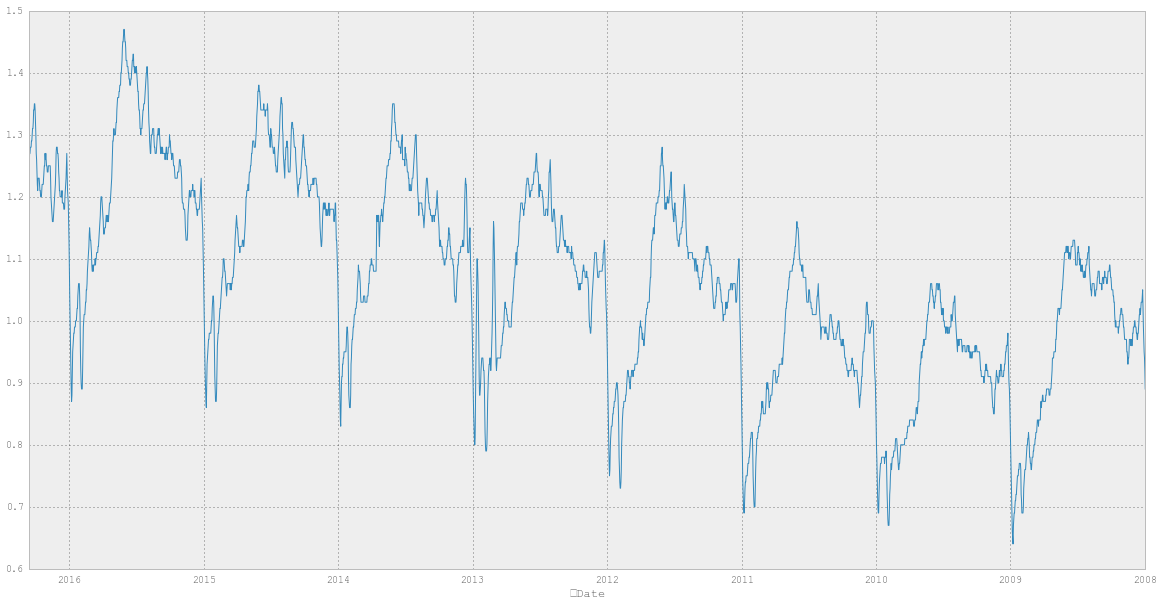

In [11]:
url = "https://www.google.com/finance/historical?q=GOOGLEINDEX_US:RENTAL\
&output=csv&startdate=20080101&ei=_znYVJjfMZOHsgeHv4G4Cg"

r = pd.read_csv(url, parse_dates = [0], index_col = 0)
r.Close.plot()

Some important questions to first consider when first looking at a time series are:

* Is there a trend, meaning that, on average, the measurements tend to increase (or decrease) over time?
* Is there seasonality, meaning that there is a regularly repeating pattern of highs and lows related to calendar time such as seasons,months, days and so on?
* Are their outliers? In regression, outliers are far away from your line. With time series data, your outliers are far away from your other data.
* Is there a long-run cycle or period unrelated to seasonality factors?
* Is there constant varianceover time, or is the variance non-constant?
* Are there any abrupt changes to either the level of the series or the variance?

## Visualizing the Time Series as a Correlation Matrix

In [13]:
import datetime as dt

# get_data_yahoo() API gets data from yahoo finance directly. 
df = web.get_data_yahoo(
     ['AAPL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP'], 
     start = dt.datetime(2010, 1, 1), 
     end = dt.datetime(2013, 1, 1))['Adj Close']
df.head()

,AAPL,GE,IBM,KO,MSFT,PEP
Date,,,,,,
2010-01-04,28.313195,12.556963,115.385996,23.689561,26.227603,50.953113
2010-01-05,28.362145,12.621983,113.992138,23.402993,26.236076,51.568809
2010-01-06,27.911008,12.556963,113.251641,23.394688,26.075067,51.052955
2010-01-07,27.859412,13.207162,112.859619,23.336543,25.803894,50.728467
2010-01-08,28.044630,13.491624,113.992138,22.904616,25.981851,50.562061


c:\Users\James\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


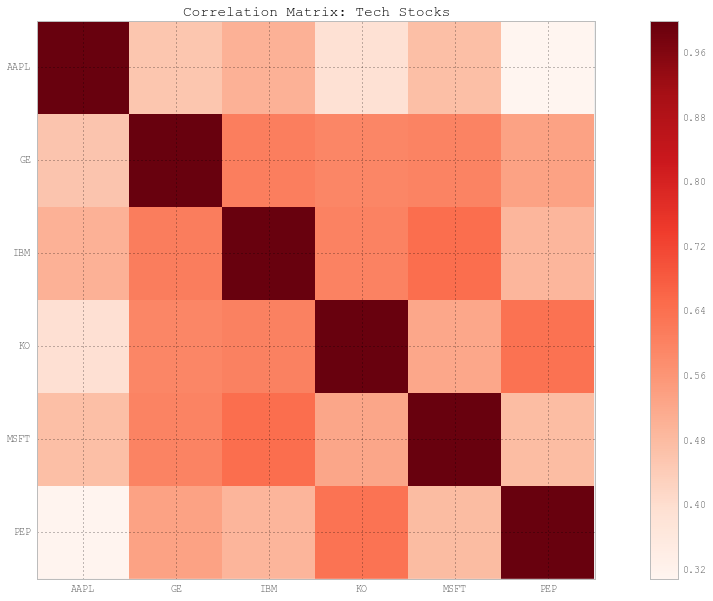

In [14]:
rets = df.pct_change()                              # Calculates Percent change over 1-day period. 
corr = rets.corr()                                  # Computes pairwise correlation of columns
plt.imshow(corr, cmap = 'Reds', interpolation = 'none')    # Visualize the values in the entire data frame.
plt.colorbar()                                            
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
plt.title("Correlation Matrix: Tech Stocks")

## Visualizing the Time Series as a OHLC (candle stick) Chart

In [15]:
from math import pi
from bokeh.plotting import *

df = pd.DataFrame(sp500)[:50]

mids = (df.Open + df.Close) / 2
spans = abs(df.Close - df.Open)

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12 * 60 * 60 * 1000        # sample 12 hours in ms
output_notebook()              # Load the Bokeh Java-Script interactive browser

figure(x_axis_type="datetime", width=1000, name="candlestick",
       tools="pan,wheel_zoom,box_zoom,reset,previewsave")

hold()

segment(df.index, df.High, df.index, df.Low, color='black')
rect(df.index[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="black")
rect(df.index[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="black")

curplot().title = "SP500 Candlestick"
xaxis().major_label_orientation = pi/4
grid().grid_line_alpha = 0.3

show()

RuntimeError: load_notebook only works inside an IPython notebook, try using force=True.

In [16]:
from bokeh.plotting import *

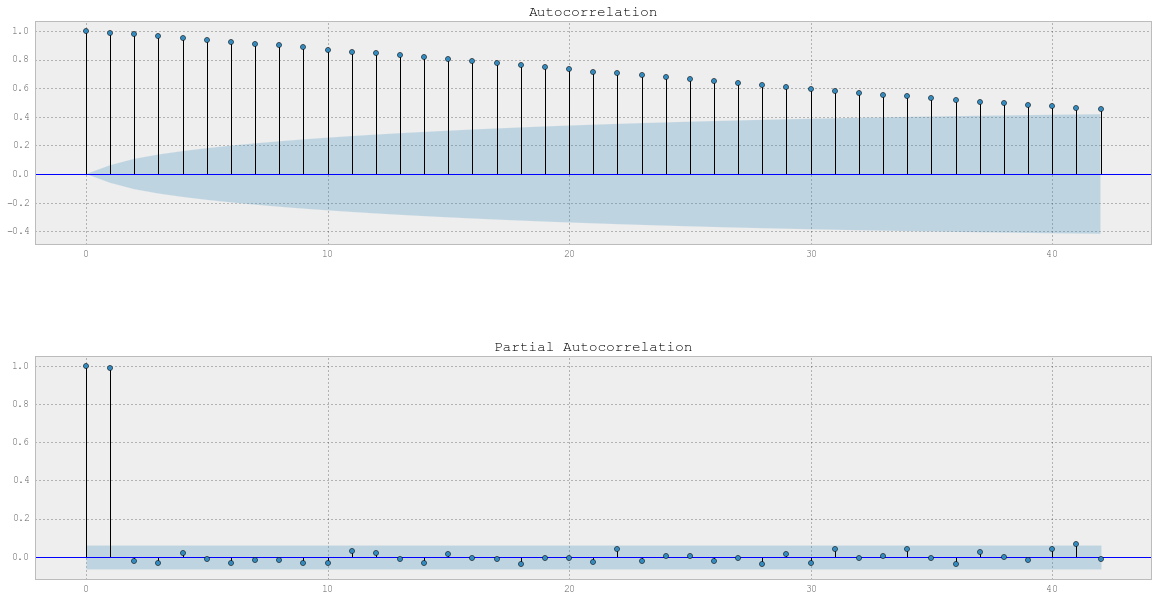

In [17]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsa

# Calculate Autocorrelation, Partial Auto Correlation and the Correlogram  
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = tsa.plot_acf(walk, lags = 42, ax = ax1)   
ax2 = fig.add_subplot(212)
fig = tsa.plot_pacf(walk, lags = 42, ax = ax2)

In [18]:
arma_mod22 = sm.tsa.ARMA(walk, (2, 2)).fit()
print(arma_mod22.summary())
print "Durbin Watson score: ", sm.stats.durbin_watson(arma_mod22.resid)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1398.208
Method:                       css-mle   S.D. of innovations              0.977
Date:                Thu, 21 Apr 2016   AIC                           2808.416
Time:                        15:07:05   BIC                           2837.862
Sample:                             0   HQIC                          2819.608
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -13.7048      5.112     -2.681      0.007       -23.725    -3.684
ar.L1.y        0.5106      0.650      0.785      0.432        -0.764     1.785
ar.L2.y        0.4814      0.647      0.744      0.4

NormaltestResult(statistic=621.66124371108117, pvalue=1.0185353853120013e-135)


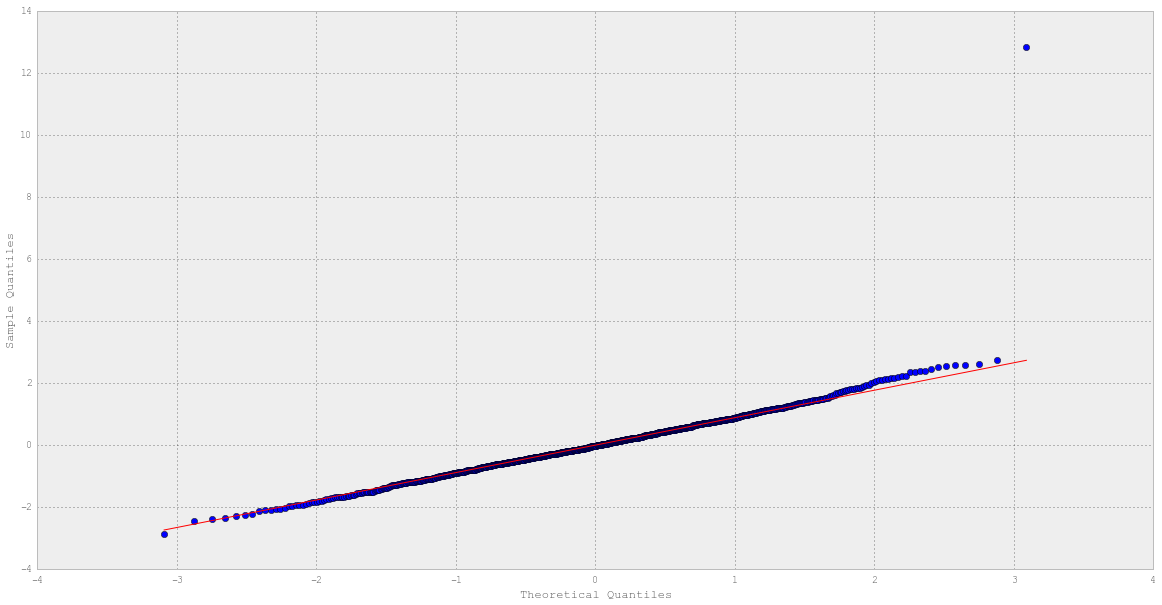

In [19]:
from statsmodels.graphics.api import qqplot
from scipy import stats

resid = arma_mod22.resid
print stats.normaltest(resid)
fig = qqplot(resid, line = 'q', fit = True)